# Memo
- ボタンに使っているアイコンは  [Piskel](https://www.piskelapp.com/)と、[pixlr](https://pixlr.com/editor/)で作成した。


In [1]:
import os,sys
import cairosvg
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython import display
sys.path.append('..')
import rdlib4 as rd

# RGBA 画像限定
def mkparaimage2(img1,img2):
    h1,w1 = img1.shape[:2]
    h2,w2 = img2.shape[:2]
    paraimg = 255*np.ones((max(h1,h2),w1+w2+10,4),dtype=np.uint8)
    paraimg[0:h1,0:w1,:] = img1
    paraimg[0:h2,w1+10:,:]=img2
    return paraimg

def mkparaimage(imglist):
    if len(imglist) == 0:
        return
    if len(imglist) == 1:
        return imglist[0]
    if len(imglist) == 2:
        return mkparaimage2(imglist[0],imglist[1])
    return mkparaimage2(imglist[0],mkparaimage(imglist[1:]))

# 画像の収集
def collectimages(path, imgexts=['jpg','jpge','png']):
    imgfiles = rd.collectimagepaths(path, imgexts)
    imgfiles.sort()
    imgs = [cv2.imread(afile,-1) for afile in imgfiles]
    return imgfiles,imgs

'''
def buildThumbnail(filename):
    (base, ext) = os.path.splitext(filename)
    if (ext == '.svg'):
        png = filename + '.png'
        if os.path.exists(filename):
            f = open(filename, 'r')
            fout = open(png, 'wb')
            cairosvg.svg2png(file_obj = f, write_to = fout, dpi = 19)
            f.close()
            fout.close()
        return(png)
    return(None)
''';

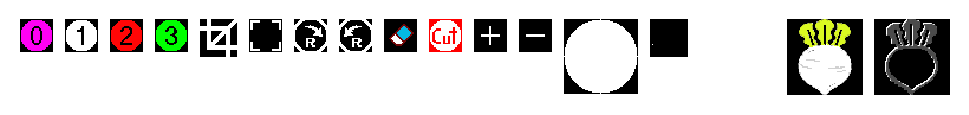

In [2]:
# 指定フォルダ内の画像を収集
DATAFOLDER = './picdicpics'
files,imgs = collectimages(DATAFOLDER)
plt.figure(dpi=200)
rd.plotimg(mkparaimage([img for img in imgs]))

In [3]:
["{} {}".format(img,cv2.imread(img,-1).shape) for img in files]

['./picdicpics\\ic00_zero.png (28, 28, 4)',
 './picdicpics\\ic01_one.png (28, 28, 4)',
 './picdicpics\\ic02_two.png (28, 28, 4)',
 './picdicpics\\ic03_three.png (28, 28, 4)',
 './picdicpics\\ic04_crop.png (32, 32, 4)',
 './picdicpics\\ic05_frame.png (28, 28, 4)',
 './picdicpics\\ic06_90minus.png (28, 28, 4)',
 './picdicpics\\ic07_90plus.png (28, 28, 4)',
 './picdicpics\\ic08_eraser.png (28, 28, 4)',
 './picdicpics\\ic09_cut.png (28, 28, 4)',
 './picdicpics\\ic10_plus.png (28, 28, 4)',
 './picdicpics\\ic11_minus.png (28, 28, 4)',
 './picdicpics\\ic12_pennib.png (63, 63, 4)',
 './picdicpics\\ic13_file.png (32, 32, 4)',
 './picdicpics\\ic20_particle.png (64, 64, 4)',
 './picdicpics\\ic98_radish.png (64, 64, 4)',
 './picdicpics\\ic99_radishB.png (64, 64, 4)']

In [4]:
picnames=['zero','one','two','three','crop','frame','rot270','rot90','eraser','cut','plus','minus','pen','file','particle','radish0','radish1']
picdiclist = {picname:img for picname,img in zip(picnames,imgs)}

In [5]:
rd.storePkl(picdiclist,'picdic.pkl')

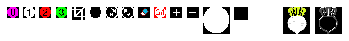

In [6]:
# 確認
abc = rd.loadPkl('picdic.pkl')
rd.plotimg(rd.mkparaimage([abc[key][:,:,:3] for key in abc]))

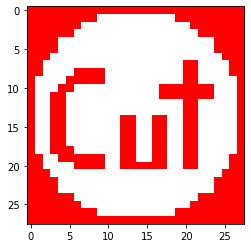

In [7]:
plt.imshow(abc['cut'][:,:,:3][:,:,::-1])

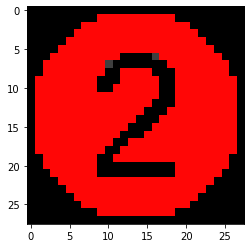

In [8]:
plt.imshow(abc['two'][:,:,:3][:,:,::-1])

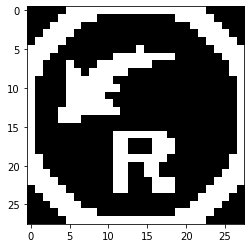

In [9]:
plt.imshow(abc['rot90'][:,:,:3][:,:,::-1])

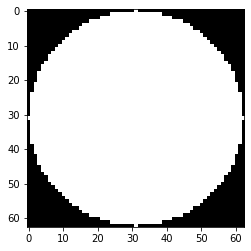

In [10]:
plt.imshow(abc['pen'][:,:,:3][:,:,::-1])

In [11]:
abc['pen'][:,:,3].max()

255

In [12]:
img = abc['pen']
img[:,:,3] = 64

In [14]:
cv2.imwrite("pennib64.png",img)

True

In [15]:
!dir

 ドライブ C のボリューム ラベルがありません。
 ボリューム シリアル番号は 7A08-C8EA です

 C:\Users\dan\OneDrive\ドキュメント\GitHub\RadiShLab\res のディレクトリ

2020/03/01  19:46    <DIR>          .
2020/03/01  19:46    <DIR>          ..
2020/03/01  19:44    <DIR>          .ipynb_checkpoints
2020/03/01  19:46            40,499 Iconmaker.ipynb
2020/02/28  19:48         3,491,456 paprika.pkl
2020/03/01  19:46               533 pennib64.png
2020/03/01  19:43           108,772 picdic.pkl
2020/02/26  11:49    <DIR>          picdicpics
2020/02/26  11:49             3,352 picdicpicsTHUM.PNG
2020/02/26  11:49           820,004 Primrose.pkl
2020/02/28  20:58    <DIR>          testpics
               6 個のファイル           4,464,616 バイト
               5 個のディレクトリ  193,950,777,344 バイトの空き領域
